In [5]:
import pandas as pd # Reading csv files
import seaborn as sns # Graphing
import matplotlib.pyplot as plt # Graphing
import numpy as np # Math
import sklearn

,DATE,CITY,VALUE
0,2019-01-01,Hyderabad,161.0
1,2019-01-01,Bhopal,175.0
2,2019-01-01,Chandigarh,163.0
3,2019-01-01,Delhi,341.0
4,2019-01-01,New Delhi,314.0


In [6]:
heart_df = pd.read_csv("datasets/heart.csv") # Read heart data
o2_df = pd.read_csv("datasets/o2Saturation.csv") # Read oxygen saturation data
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
# Removing outliers

from scipy.stats import zscore
heart_zscores = zscore(heart_df) # Zscore assigns a score in terms of standard deviation
abs_heart_zscores = np.abs(heart_zscores) # Get rid of negatives

# Filter out values who are more than 3 Standard deviations off from the mean
filtered_entries = (abs_heart_zscores < 3).all(axis=1) 
heart_df = heart_df[filtered_entries]
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,54.294737,0.691228,0.978947,131.052632,243.719298,0.143860,0.529825,149.814035,0.329825,0.992281,1.417544,0.652632,2.319298,0.550877
std,9.111060,0.462799,1.037796,17.013273,45.002564,0.351565,0.520686,22.618323,0.470976,1.065468,0.603138,0.916612,0.581232,0.498280
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,3.000000,3.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='count'>

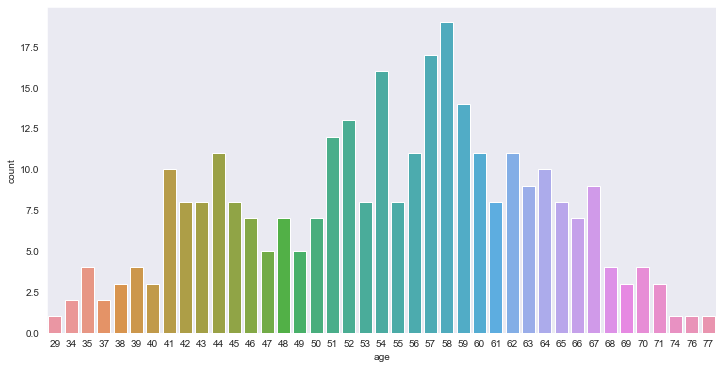

In [8]:
# Visualization of age distribution
plt.figure(figsize=(12, 6))
sns.set_style("dark")
sns.countplot(x='age', data=heart_df)
